In [33]:
#importing data processing libraries
import pandas as pd
import numpy as np
#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# datetime module
import datetime
# to ignore future warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [34]:
energy= pd.read_csv("energydata_complete.csv")

In [35]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [36]:
energy.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [37]:
#rename columns

column_names = {'T1':'Temp_in_kitchen_area', 
                'RH_1': 'Humidity_in_kitchen_area', 
                'T2': 'Temp_in_living_room_area',
                'RH_2': 'Humidity_in_living_room_area', 
                'T3': 'Temp_in_laundry_room_area', 
                'RH_3': 'Humidity_in_laundry_room_area', 
                'T4': 'Temp_in_office_room', 
                'RH_4': 'Humidity_in_office_room', 
                'T5': 'Temp_in_bathroom', 
                'RH_5': 'Humidity_in_bathroom', 
                'T6': 'Temp_outside_the_building', 
                'RH_6': 'Humidity_outside_the_building',
                'T7': 'Temp_in_ironing_room', 
                'RH_7': 'Humidity_in_ironing_room', 
                'T8': 'Temp_in_teenager_room',
                'RH_8': 'Humidity_in_teenager_room',
                'T9': 'Temp_in_parents_room',
                'RH_9': 'Humidity_in_parents_room',
                'T_out': 'Temp_outside', 
                'Press_mm_hg': 'Pressure_in_mm_Hg',
                'RH_out': 'Humidity_outside', 
                'rv1': 'Random_variable_1',
                'rv2': 'Random_variable_2'}

In [48]:
energy.drop("date", axis=1, inplace=True)


KeyError: "['date'] not found in axis"

In [49]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_energy = pd.DataFrame(scaler.fit_transform(energy), columns=energy.columns)
features_energy = normalised_energy.drop(columns=['lights'])
random_target = normalised_energy['Appliances']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_energy, random_target, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# fit the model to the training dataset
linear_model.fit(x_train, y_train)

# obtain predictions
predicted_values = linear_model.predict(x_test)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) #prints 0.252

0.0

In [50]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) #prints 498.8992

0.0

<AxesSubplot:xlabel='Temp_in_living_room_area', ylabel='Humidity_in_teenager_room'>

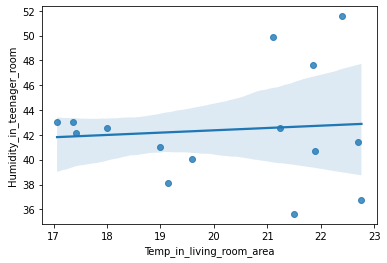

In [41]:
energy = energy.rename(columns=column_names)

#select a sample of the dataset
simple_linear_reg_energy = energy[['Temp_in_living_room_area', 'Humidity_in_teenager_room']].sample(15, random_state=2)

#regression plot
sns.regplot(x="Temp_in_living_room_area", y="Humidity_in_teenager_room", data=simple_linear_reg_energy)

**Measuring Regression Performance(Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE))**

In [8]:
# Mean Absolute Error (MAE)
# Firstly, we normalise our dataset to a common scale using the min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_energy = pd.DataFrame(scaler.fit_transform(energy), columns=energy.columns)
features_energy = normalised_energy.drop(columns=['Random_variable_1', 'Random_variable_2'])
random_target = normalised_energy['Random_variable_1']

In [9]:
# Now, we split our dataset into the training and testing dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_energy, random_target, test_size=0.3, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [11]:
# fit the model to the training dataset
linear_model.fit(x_train, y_train)

# obtain predictions
predicted_values = linear_model.predict(x_test)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 4) #prints 0.252

0.2516

In [12]:
# Residual Sum of Squares (RSS)

import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 4) #prints 498.8992

498.8992

In [13]:
# Root Mean Square Error (RMSE)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.29

0.29

In [14]:
# R-Squared

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 4) #prints -0.0013

-0.0013

<AxesSubplot:xlabel='Temp_in_living_room_area', ylabel='Temp_outside_the_building'>

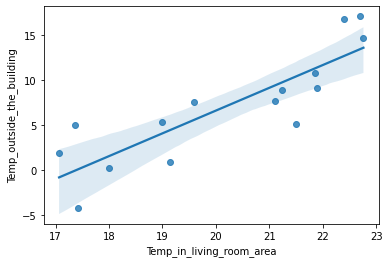

In [21]:

#select a sample of the dataset
simple_linear_reg_energy = energy[['Temp_in_living_room_area', 'Temp_outside_the_building']].sample(15, random_state=2)

#regression plot
sns.regplot(x="Temp_in_living_room_area", y="Temp_outside_the_building", data=simple_linear_reg_energy)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_energy, random_target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# fit the model to the training dataset
linear_model.fit(x_train, y_train)

# obtain predictions
predicted_values = linear_model.predict(x_test)

In [25]:
# R-Squared

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) #prints -0.0013

-0.0

In [26]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

498.9

PENALIZATION METHODS

In [15]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [16]:
# Feature Selection and Lasso Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [17]:
#comparing the effects of regularisation

def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature

  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [18]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Tdewpoint,-0.108809,-0.083491,-0.000000
1,Humidity_in_living_room_area,-0.084937,-0.079847,-0.000000
2,Temp_in_bathroom,-0.068017,-0.065428,-0.000000
3,Humidity_in_parents_room,-0.065370,-0.064327,-0.000000
4,Temp_outside_the_building,-0.025360,-0.019900,-0.000000
5,Humidity_in_bathroom,-0.025194,-0.025555,-0.000000
6,Temp_in_kitchen_area,-0.024500,-0.025433,-0.000000
7,lights,-0.021766,-0.021617,-0.000000
8,Temp_in_laundry_room_area,-0.013717,-0.013443,-0.000000
9,Visibility,-0.013638,-0.013500,-0.000000
